In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv


In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data=pd.read_csv("/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data['Month']=pd.to_datetime(data['Month'],format='%Y-%m')

In [7]:
msk=(data.index<len(data)-30)
train = data[msk]
test = data[~msk]
print(train)

         Month  #Passengers
0   1949-01-01          112
1   1949-02-01          118
2   1949-03-01          132
3   1949-04-01          129
4   1949-05-01          121
..         ...          ...
109 1958-02-01          318
110 1958-03-01          362
111 1958-04-01          348
112 1958-05-01          363
113 1958-06-01          435

[114 rows x 2 columns]


In [8]:
data.set_index("Month",inplace=True)
train.set_index("Month",inplace=True)
test.set_index("Month",inplace=True)

In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


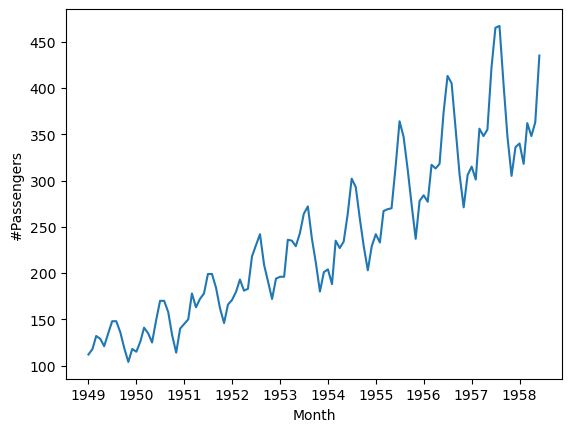

In [11]:
sns.lineplot(train,x='Month',y='#Passengers')
plt.show()

<Figure size 1200x600 with 0 Axes>

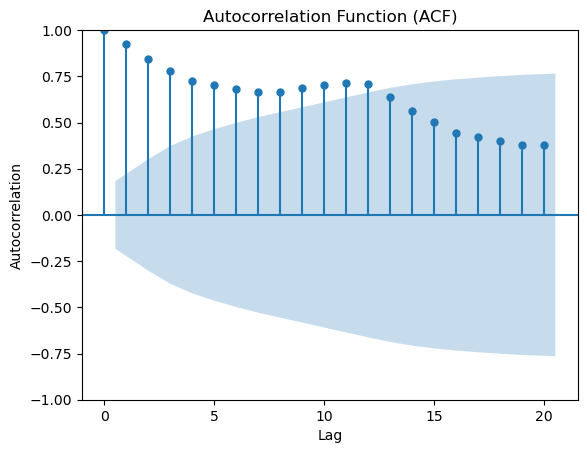

In [12]:
plt.figure(figsize=(12, 6))
plot_acf(train, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x600 with 0 Axes>

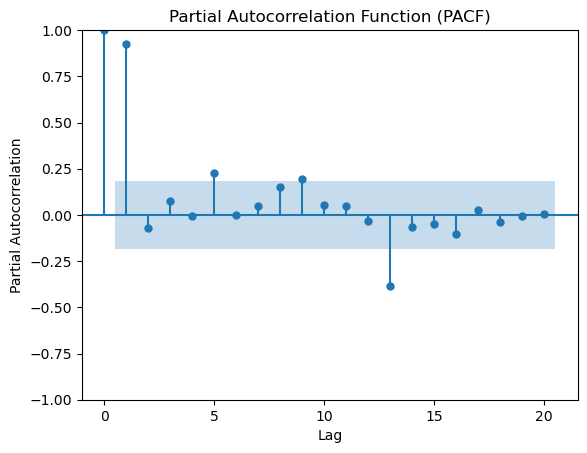

In [13]:
plt.figure(figsize=(12, 6))
plot_pacf(train, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(train)
print(f'p-value {adf_test[1]}')

p-value 0.9138596405809456


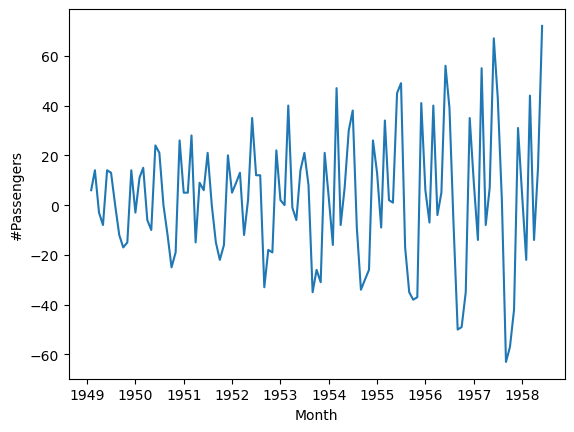

In [15]:
sns.lineplot(train.diff(),x='Month',y='#Passengers')
plt.show()

<Figure size 1200x600 with 0 Axes>

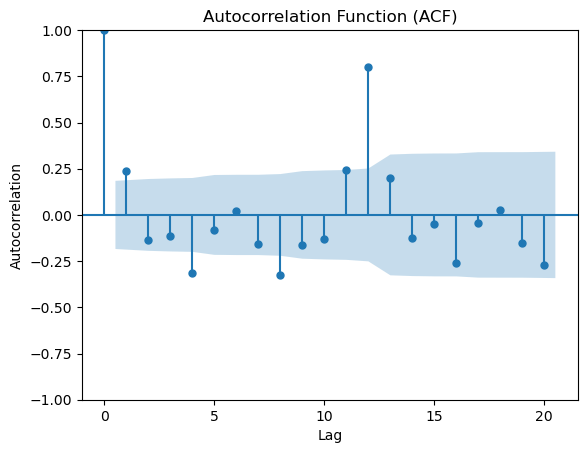

In [16]:
plt.figure(figsize=(12, 6))
plot_acf(train.diff().dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x600 with 0 Axes>

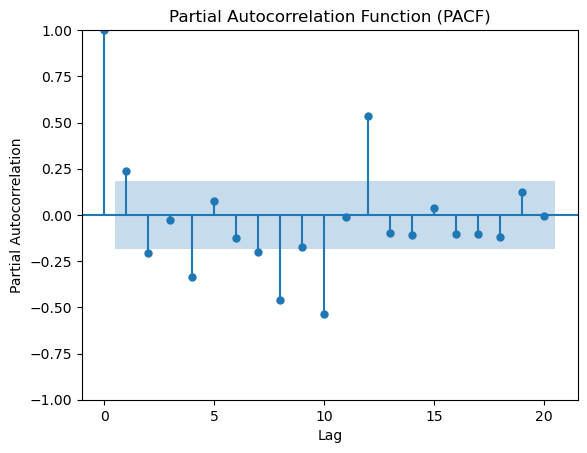

In [17]:
plt.figure(figsize=(12, 6))
plot_pacf(train.diff().dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [18]:
dataf=train.diff().dropna()
adf_test=adfuller(dataf)
print(f'p-value {adf_test[1]}')

p-value 0.11578737548208418


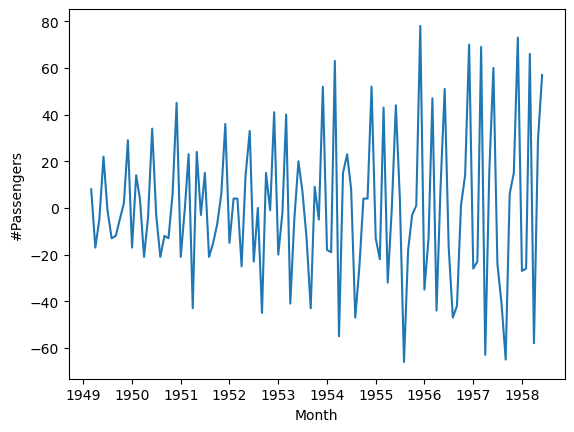

In [19]:
sns.lineplot(train.diff().diff(),x='Month',y='#Passengers')
plt.show()

In [20]:
dataf=train.diff().diff().dropna()
adf_test=adfuller(dataf)
print(f'p-value {adf_test[1]}')

p-value 1.5449294749170299e-09


<Figure size 1200x600 with 0 Axes>

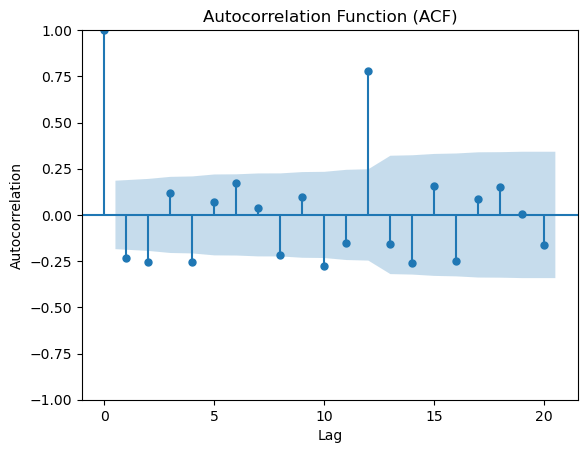

In [21]:
plt.figure(figsize=(12, 6))
plot_acf(train.diff().diff().dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x600 with 0 Axes>

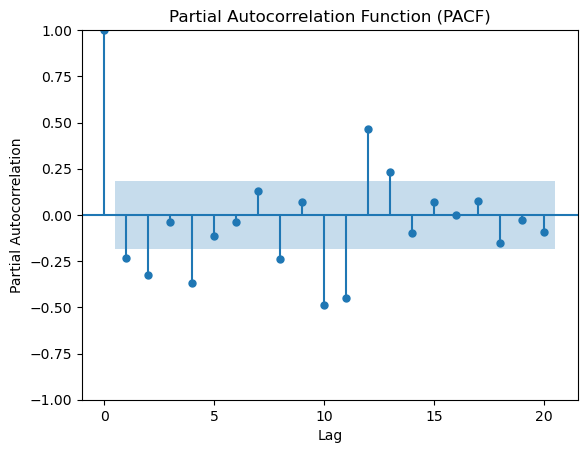

In [22]:
plt.figure(figsize=(12, 6))
plot_pacf(train.diff().diff().dropna(), lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train,order=(1,2,2))
model_fit=model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -517.846
Date:                Tue, 01 Aug 2023   AIC                           1043.692
Time:                        19:07:16   BIC                           1054.566
Sample:                    01-01-1949   HQIC                          1048.104
                         - 06-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5299      0.122     -4.348      0.000      -0.769      -0.291
ma.L1         -0.0821     14.874     -0.006      0.996     -29.235      29.071
ma.L2         -0.9177     13.627     -0.067      0.9

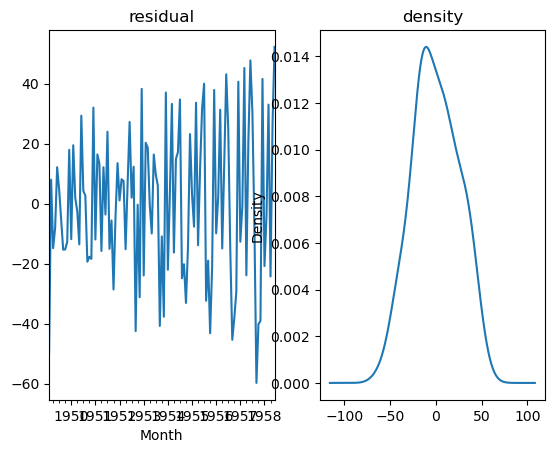

In [24]:
residules=model_fit.resid[1:]
fig,ax=plt.subplots(1,2)
residules.plot(title='residual',ax=ax[0])
residules.plot(title='density',kind='kde',ax=ax[1])
plt.show()

<Figure size 1200x600 with 0 Axes>

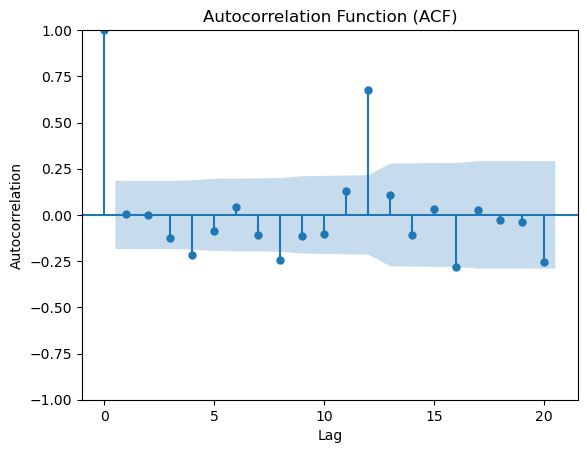

In [25]:
plt.figure(figsize=(12, 6))
plot_acf(residules, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x600 with 0 Axes>

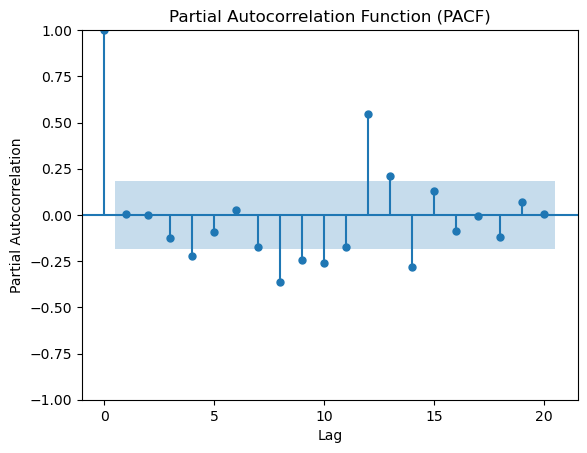

In [26]:
plt.figure(figsize=(12, 6))
plot_pacf(residules, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

<Axes: xlabel='Month'>

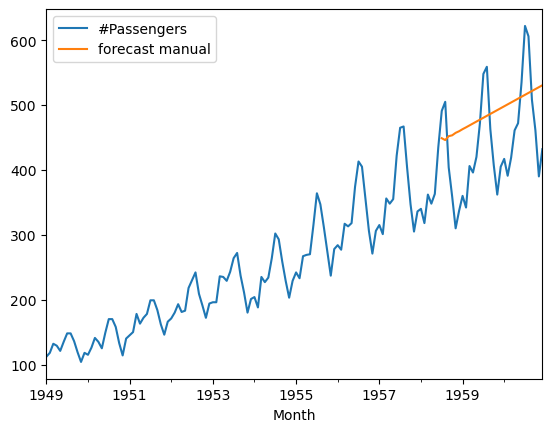

In [27]:
forecast_test=model_fit.forecast(len(test))
data['forecast manual']=[None]*len(train)+list(forecast_test)
data.plot()

In [28]:
import pmdarima as pm
auto_predict=pm.auto_arima(train,stepwise=False,seasonal=False)
auto_predict.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -517.217
Date:                Tue, 01 Aug 2023   AIC                           1046.433
Time:                        19:07:26   BIC                           1062.797
Sample:                    01-01-1949   HQIC                          1053.073
                         - 06-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3478      2.387      1.403      0.161      -1.331       8.026
ar.L1          0.2688      0.086      3.132      0.002       0.101       0.437
ar.L2         -0.2760      0.097     -2.840      0.005      -0.467      -0.086
ar.L3          0.0725      0.075      0.960      0.337      -0.075       0.220
ar.L4         -0.3486      0.075     -4.662      0.000      -0.495      -0.202
sigma2       550.2924     99.443      5.534      0.000     355.387     745.197
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 3.58
Prob(Q):                              0.77   Prob(JB):                         0.17
Heteroskedasticity (H):               5.60   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

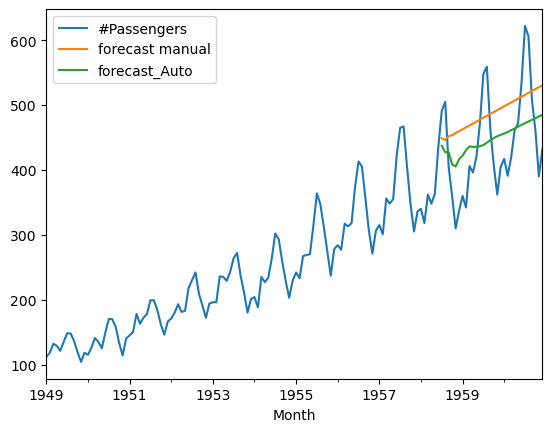

In [29]:
forecast_test_auto=auto_predict.predict(n_periods=len(test))
data['forecast_Auto']=[None]*len(train)+list(forecast_test_auto)
data.plot()

In [30]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
mae=mean_absolute_error(test,forecast_test)
mape=mean_absolute_percentage_error(test,forecast_test)
mse=np.sqrt(mean_squared_error(test,forecast_test))
print(mae)
print(mape)
print(mse)

76.54240500617628
0.18703452934432693
84.86720833911947


In [31]:
mae=mean_absolute_error(test,forecast_test_auto)
mape=mean_absolute_percentage_error(test,forecast_test_auto)
mse=np.sqrt(mean_squared_error(test,forecast_test_auto))
print(mae)
print(mape)
print(mse)

59.12753677845696
0.13547765226519715
69.72405965858329


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
# Assuming you know the order of seasonal and non-seasonal components (p, d, q, P, D, Q, s)
# You can determine these values by analyzing the autocorrelation and partial autocorrelation plots of the data
order = (4,1,0)  # Non-seasonal order
seasonal_order = (4,1,0,12)  # Seasonal order

model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit()

# Make predictions for the forecast horizon
predictions = result.get_forecast(steps=len(test))

# Extract the predicted values and confidence intervals
predicted_passengers = predictions.predicted_mean
confidence_intervals = predictions.conf_int()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24766D+00    |proj g|=  1.99098D-01

At iterate    5    f=  3.21193D+00    |proj g|=  1.20977D-02

At iterate   10    f=  3.20872D+00    |proj g|=  5.85690D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     13     16      1     0     0   1.408D-05   3.209D+00
  F =   3.2087236246786865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


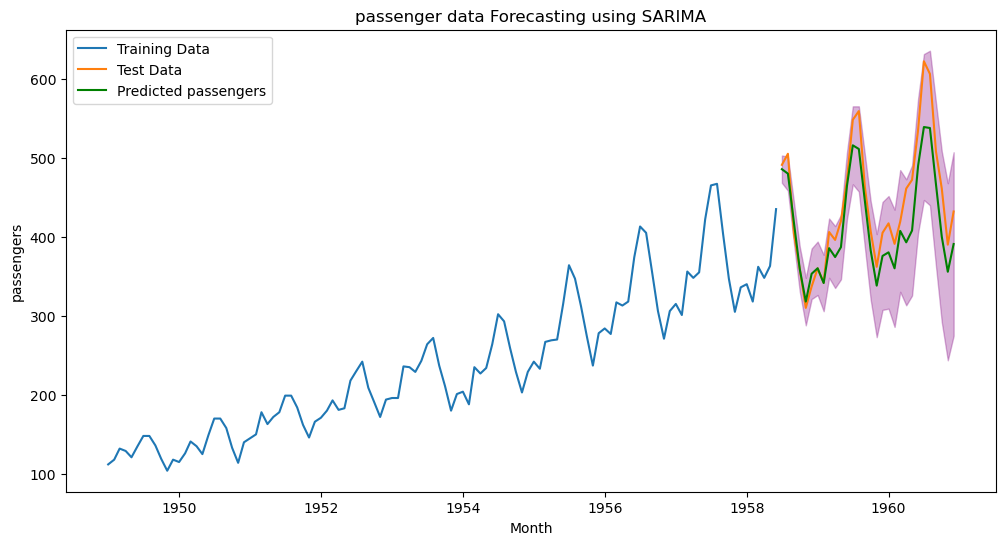

In [34]:
# Plot the training data, test data, and predicted sales
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, predicted_passengers, label='Predicted passengers', color='green')

# Fill the area between the confidence intervals
plt.fill_between(test.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='purple', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('passengers')
plt.title('passenger data Forecasting using SARIMA')
plt.legend()
plt.show()


In [35]:
mae=mean_absolute_error(test,predicted_passengers)
mape=mean_absolute_percentage_error(test,predicted_passengers)
mse=np.sqrt(mean_squared_error(test,predicted_passengers))
print(mae)
print(mape)
print(mse)

30.43493954800192
0.06523357937725306
37.41558633466777
